In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator


import CASBI.create_template_library as ctl
import CASBI.inference as inference

/opt/anaconda/conda/envs/torch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/anaconda/conda/envs/torch/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2024-11-27 18:37:29.115095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-27 18:37:30.363703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [2]:
#path to the files generetated by the CASBI.preprocessing

galaxy_file_path = '../../data/casbi_rewriting/new_files/'
dataframe_path = '../../data/casbi_rewriting/dataframe.parquet'
preprocessing_path = '../../data/casbi_rewriting/preprocess_file.npz'

#generate template library
template_library = ctl.TemplateLibrary(galaxy_file_path=galaxy_file_path, dataframe_path=dataframe_path, preprocessing_path=preprocessing_path, sigma=0.)    
template_library.gen_libary(N_test=10, N_train=100)



unique galaxy in the test set that are not empty: 10
unique galaxy in the training set that are not empty: 100


/tmp/ipykernel_965893/3556906216.py:10: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(observable.T),


Text(0, 0.5, '[O/Fe]')

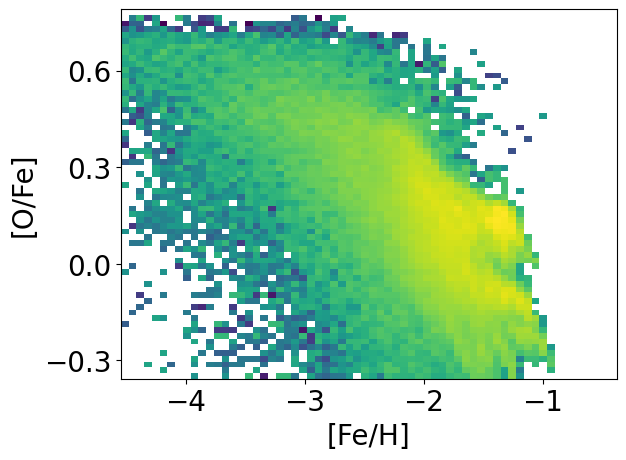

In [17]:
from tkinter import font


i=0
j=0
observable =  template_library.test_galaxies[(i, j)]['x']


fig, ax = plt.subplots()
ax.imshow(np.log10(observable.T), 
           extent = [template_library.feh_lim[0], template_library.feh_lim[1], template_library.ofe_lim[0], template_library.ofe_lim[1]], 
           origin='lower', 
           cmap='viridis',
           aspect='auto')

# Set the maximum number of ticks on the x and y axes to 4
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))


ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('[Fe/H]', fontsize=20)
ax.set_ylabel('[O/Fe]', fontsize=20)

In [ ]:
#Inference

x_train, params_train, x_test, params_test = template_library.get_inference_input()
posterior_ensamble, summaries = inference.train_inference(x=x_train, theta=params_train, learning_rate=1e-4, output_dir=f'./posterior/posterior_{sigma}')
